In [1]:
# from aerobot.plot import plot_training_curve
import os
from aerobot.io import load_results_dict, RESULTS_PATH # , FEATURE_SUBTYPES, FEATURE_TYPES
import matplotlib.pyplot as plt
from aerobot.plot import plot_configure_mpl, plot_confusion_matrix
from matplotlib.gridspec import GridSpec
from aerobot.dataset import dataset_load_training_validation
import pandas as pd 
import numpy as np 
from typing import Dict, List

%load_ext autoreload
%autoreload 2

plot_configure_mpl(n_colors=3)

# SI Figure 3

This figure shows a selection of confusion matrices for the ternary classifiers. The most relevant feature types are probably the ones in the "minimal list of feature types" (see below) from Figure 1. The first row of confusion matrices in two rows, with the first row containing the confusion matrices from logistic regression-based classifiers, and the second row containing confusion matrices for the nonlinear-based classifiers.

In [2]:
# "Minimal list" of feature types.
FEATURE_TYPES = ['KO', 'embedding.geneset.oxygen', 'embedding.genome', 'chemical', 'aa_1mer', 'aa_3mer']

In [3]:
# Load the model training results. 
nonlinear_results = dict()
logistic_results = dict()

for feature_type in FEATURE_TYPES:
    nonlinear_results[feature_type] = load_results_dict(os.path.join(RESULTS_PATH, f'train_nonlinear_{feature_type}_ternary.json'))
    logistic_results[feature_type] = load_results_dict(os.path.join(RESULTS_PATH, f'train_logistic_{feature_type}_ternary.json'))

In [39]:
def plot_si_figure_3a(nonlinear_results:Dict, fig:plt.Figure=None, grids:List[GridSpec]=None):
    '''Plots the first row of confusion matrices, which display results for nonlinear classifiers.'''

    fig.text(0.1, 0.9, 'A', fontsize=18, ha='left')

    for i, feature_type in enumerate(FEATURE_TYPES):
        ax = fig.add_subplot(grids[i])
        plot_confusion_matrix(nonlinear_results[feature_type], feature_type=feature_type, ax=ax)

        if i != 0: # Turn of the tick labels for the y-axis for all except the leftmost plot.
            ax.set_yticks([])

        ax.set_xticks([])
    

 

In [40]:
def plot_si_figure_3b(logistic_results:Dict, fig:plt.Figure=None, grids:List[GridSpec]=None):
    '''Plots the first row of confusion matrices, which display results for logistic classifiers.'''
    
    fig.text(0.1, 0.45, 'B', fontsize=18, ha='left')

    for i, feature_type in enumerate(FEATURE_TYPES):
        ax = fig.add_subplot(grids[i])
        plot_confusion_matrix(logistic_results[feature_type], feature_type=feature_type, ax=ax)
        # Turn of the tick labels for all y-axes except the one to the far left. 
        if i != 0:
            ax.set_yticks([])
        ax.set_title('') # I think it's OK to turn off the title. 

 

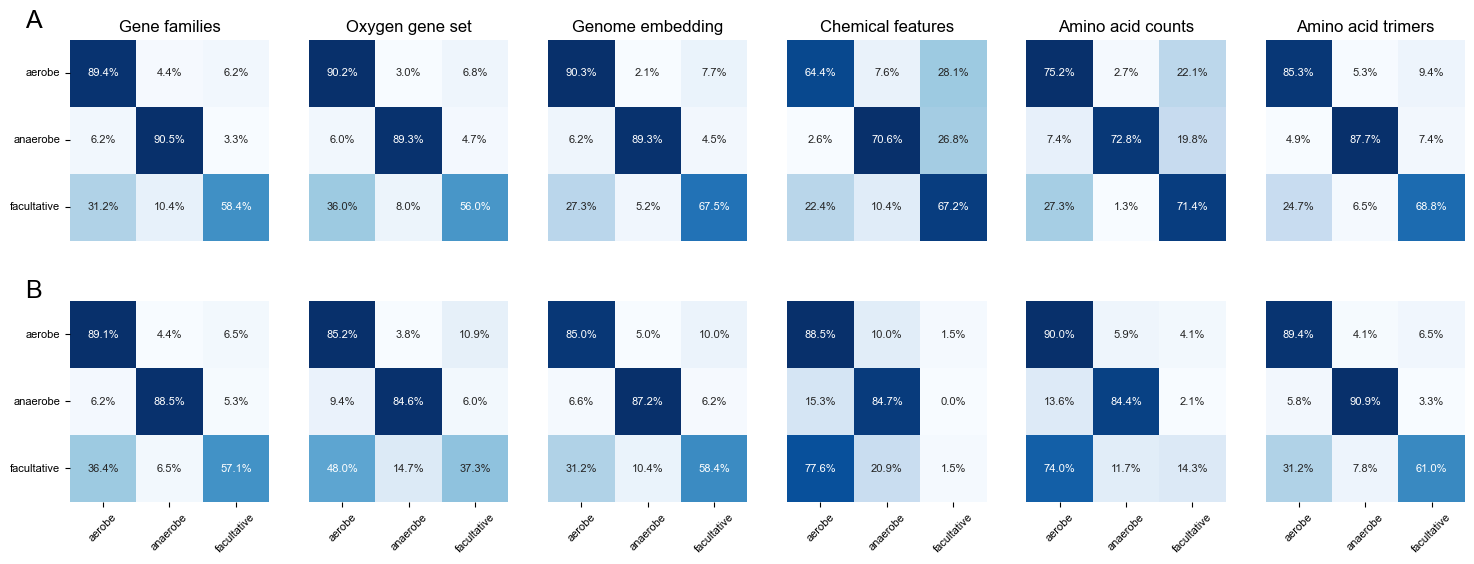

In [42]:
fig = plt.figure(figsize=(3 * len(FEATURE_TYPES), 6))
grid = GridSpec(2, len(FEATURE_TYPES), hspace=0.3)

plot_si_figure_3a(nonlinear_results, fig=fig, grids=[grid[0, i] for i in range(len(FEATURE_TYPES))])
plot_si_figure_3b(logistic_results, fig=fig, grids=[grid[1, i] for i in range(len(FEATURE_TYPES))])

plt.show()